<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Firdaus_Arif_Ramadhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Introduction**

**Air Quality Measurements Dataset**

1.  Description

    This dataset contains detailed air quality measurements collected over a specified period. It focuses on various pollutants, providing a comprehensive overview of air quality metrics.

2. Feature	Description

  - Date: The date of the measurement.
  - Time: The time of the measurement.
  - CO(GT): Concentration of carbon monoxide (CO) in the air (µg/m³).
  - PT08.S1(CO):	Sensor measurement for CO concentration.
  - NMHC(GT):	Concentration of non-methane hydrocarbons (NMHC) (µg/m³).
  - C6H6(GT):	Concentration of benzene (C6H6) in the air (µg/m³).
  - PT08.S2(NMHC):	Sensor measurement for NMHC concentration.
  - NOx(GT):	Concentration of nitrogen oxides (NOx) in the air (µg/m³).
  - PT08.S3(NOx):	Sensor measurement for NOx concentration.
  - NO2(GT):	Concentration of nitrogen dioxide (NO2) in the air (µg/m³).

3. Total Rows: 9357
4. Source: [Kaggle](https://www.kaggle.com/datasets/dakshbhalala/uci-air-quality-dataset/data)

# **2. Import Library**

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn yellowbrick scipy kneed

In [3]:
# System and Settings
import time
import warnings
warnings.filterwarnings('ignore')

# Core Data Processing Libraries
import numpy as np
import pandas as pd
# Configure pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
## Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Dimensionality Reduction
from sklearn.decomposition import PCA

## Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Statistical Analysis
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.spatial.distance import cdist

# **3. Import Dataset**

In [4]:
df = pd.read_csv("https://media.githubusercontent.com/media/fxrdhan/Machine-Learning-Project/refs/heads/main/data/AirQualityUCI.csv")

In [5]:
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00   2.600     1360.000   150.000    11.900   
1     3/10/2004  19:00:00   2.000     1292.000   112.000     9.400   
2     3/10/2004  20:00:00   2.200     1402.000    88.000     9.000   
3     3/10/2004  21:00:00   2.200     1376.000    80.000     9.200   
4     3/10/2004  22:00:00   1.600     1272.000    51.000     6.500   
...         ...       ...     ...          ...       ...       ...   
9466        NaN       NaN     NaN          NaN       NaN       NaN   
9467        NaN       NaN     NaN          NaN       NaN       NaN   
9468        NaN       NaN     NaN          NaN       NaN       NaN   
9469        NaN       NaN     NaN          NaN       NaN       NaN   
9470        NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0          1046.000  166.000      1056.000  113.000      1692.000   
1           955.000  103.000      1174.000   92.000      1559.000   
2           939.000  131.000      1140.000  114.000      1555.000   
3           948.000  172.000      1092.000  122.000      1584.000   
4           836.000  131.000      1205.000  116.000      1490.000   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)      T     RH    AH  Unnamed: 15  Unnamed: 16  
0        1268.000 13.600 48.900 0.758          NaN          NaN  
1         972.000 13.300 47.700 0.726          NaN          NaN  
2        1074.000 11.900 54.000 0.750          NaN          NaN  
3        1203.000 11.000 60.000 0.787          NaN          NaN  
4        1110.000 11.200 59.600 0.789          NaN          NaN  
...           ...    ...    ...   ...          ...          ...  
9466          NaN    NaN    NaN   NaN          NaN          NaN  
9467          NaN    NaN    NaN   NaN          NaN          NaN  
9468          NaN    NaN    NaN   NaN          NaN          NaN  
9469          NaN    NaN    NaN   NaN          NaN          NaN  
9470          NaN    NaN    NaN   NaN          NaN          NaN  

[9471 rows x 17 columns]

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [7]:
df.sample(5)

Date      Time   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
5007  10/5/2004   9:00:00 -200.000     1337.000  -200.000    21.600   
8172  2/14/2005   6:00:00    0.700      995.000  -200.000     2.900   
2612  6/27/2004  14:00:00    0.700      841.000  -200.000     4.000   
686    4/8/2004   8:00:00    5.100     1512.000   802.000    27.100   
8451  2/25/2005  21:00:00    2.300     1059.000  -200.000     8.100   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
5007       1339.000 -200.000       525.000 -200.000      1870.000   
8172        646.000  121.000       895.000   81.000      1053.000   
2612        712.000   38.000      1175.000   50.000      1339.000   
686        1482.000  308.000       596.000  118.000      2189.000   
8451        905.000  356.000       735.000  179.000      1098.000   

      PT08.S5(O3)      T     RH    AH  Unnamed: 15  Unnamed: 16  
5007     1622.000 20.600 58.500 1.405          NaN          NaN  
8172      818.000  6.900 70.000 0.700          NaN          NaN  
2612      476.000 41.300 12.800 0.993          NaN          NaN  
686      1605.000  9.900 64.300 0.786          NaN          NaN  
8451     1130.000  7.300 52.800 0.540          NaN          NaN

In [8]:
df.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 9357.000     9357.000  9357.000  9357.000       9357.000 9357.000   
mean   -34.208     1048.990  -159.090     1.866        894.595  168.617   
std     77.657      329.833   139.789    41.380        342.333  257.434   
min   -200.000     -200.000  -200.000  -200.000       -200.000 -200.000   
25%      0.600      921.000  -200.000     4.000        711.000   50.000   
50%      1.500     1053.000  -200.000     7.900        895.000  141.000   
75%      2.600     1221.000  -200.000    13.600       1105.000  284.000   
max     11.900     2040.000  1189.000    63.700       2214.000 1479.000   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      9357.000 9357.000      9357.000     9357.000 9357.000 9357.000   
mean        794.990   58.149      1391.480      975.072    9.778   39.485   
std         321.994  126.940       467.210      456.938   43.204   51.216   
min        -200.000 -200.000      -200.000     -200.000 -200.000 -200.000   
25%         637.000   53.000      1185.000      700.000   10.900   34.100   
50%         794.000   96.000      1446.000      942.000   17.200   48.600   
75%         960.000  133.000      1662.000     1255.000   24.100   61.900   
max        2683.000  340.000      2775.000     2523.000   44.600   88.700   

            AH  Unnamed: 15  Unnamed: 16  
count 9357.000        0.000        0.000  
mean    -6.838          NaN          NaN  
std     38.977          NaN          NaN  
min   -200.000          NaN          NaN  
25%      0.692          NaN          NaN  
50%      0.977          NaN          NaN  
75%      1.296          NaN          NaN  
max      2.231          NaN          NaN

In [9]:
# Remove Missing Attribute Values (-200)
df = df[(df[['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'T', 'RH']] != -200).all(axis=1)]

In [10]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      7055
Unnamed: 16      7055
dtype: int64

In [11]:
df.duplicated().sum()

113

In [12]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.columns.tolist()

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

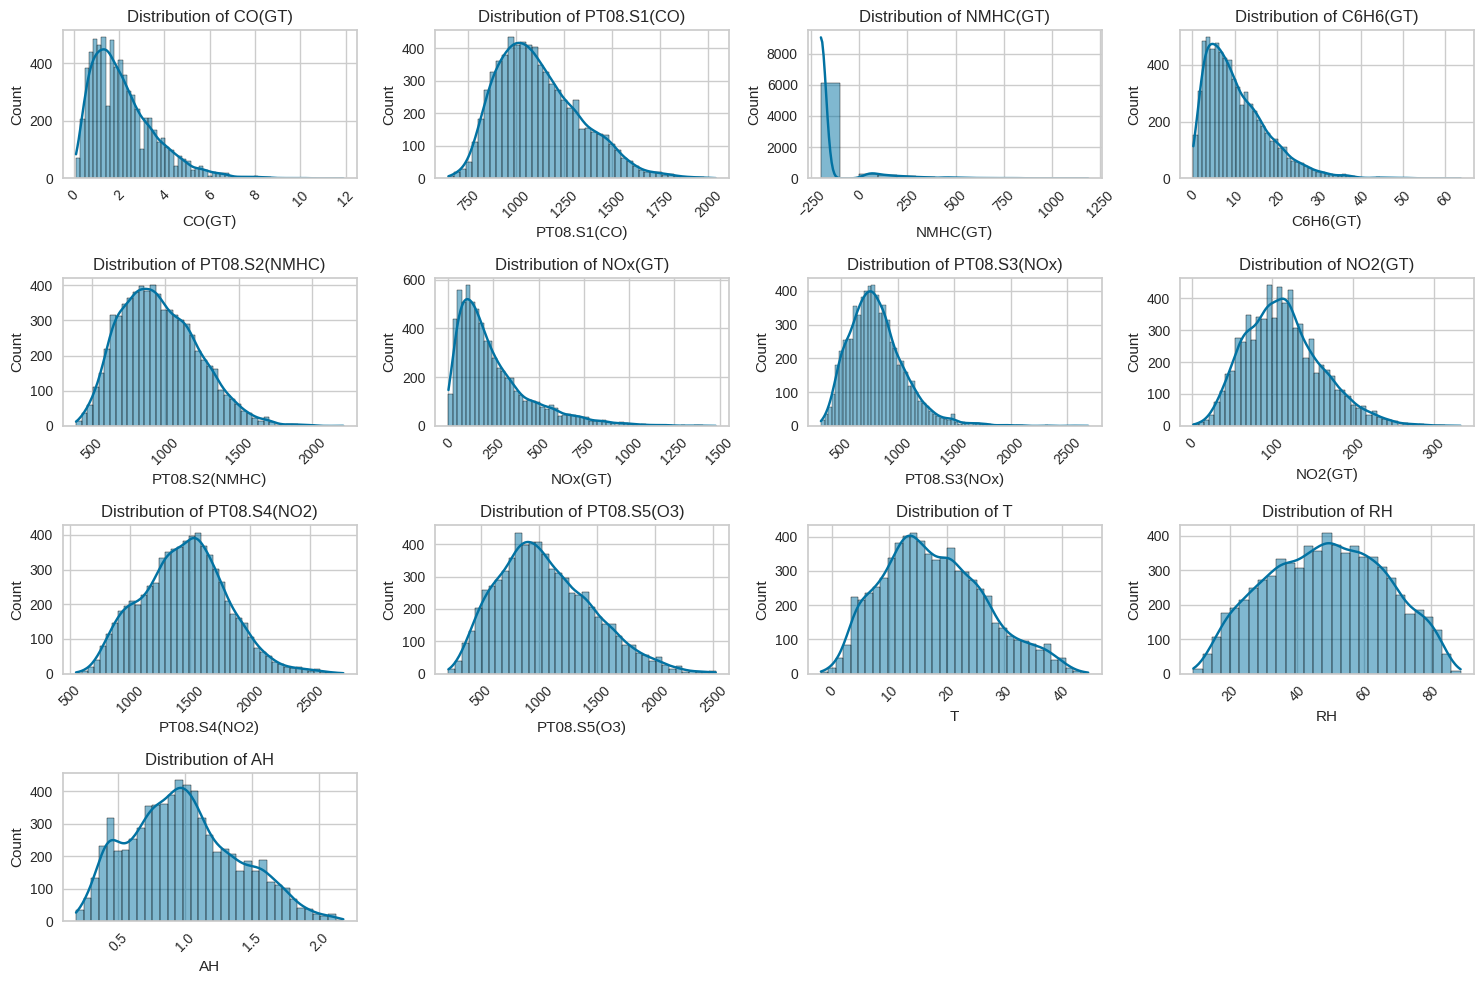

In [14]:
numeric_columns = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Most features show a right-skewed distribution.
- Some features, such as NMHC(GT), have significant zero or near-zero values, which indicate missing or censored data encoded as zero.
- Features like T (Temperature), RH (Relative Humidity), and AH (Absolute Humidity) show a more symmetric distribution.

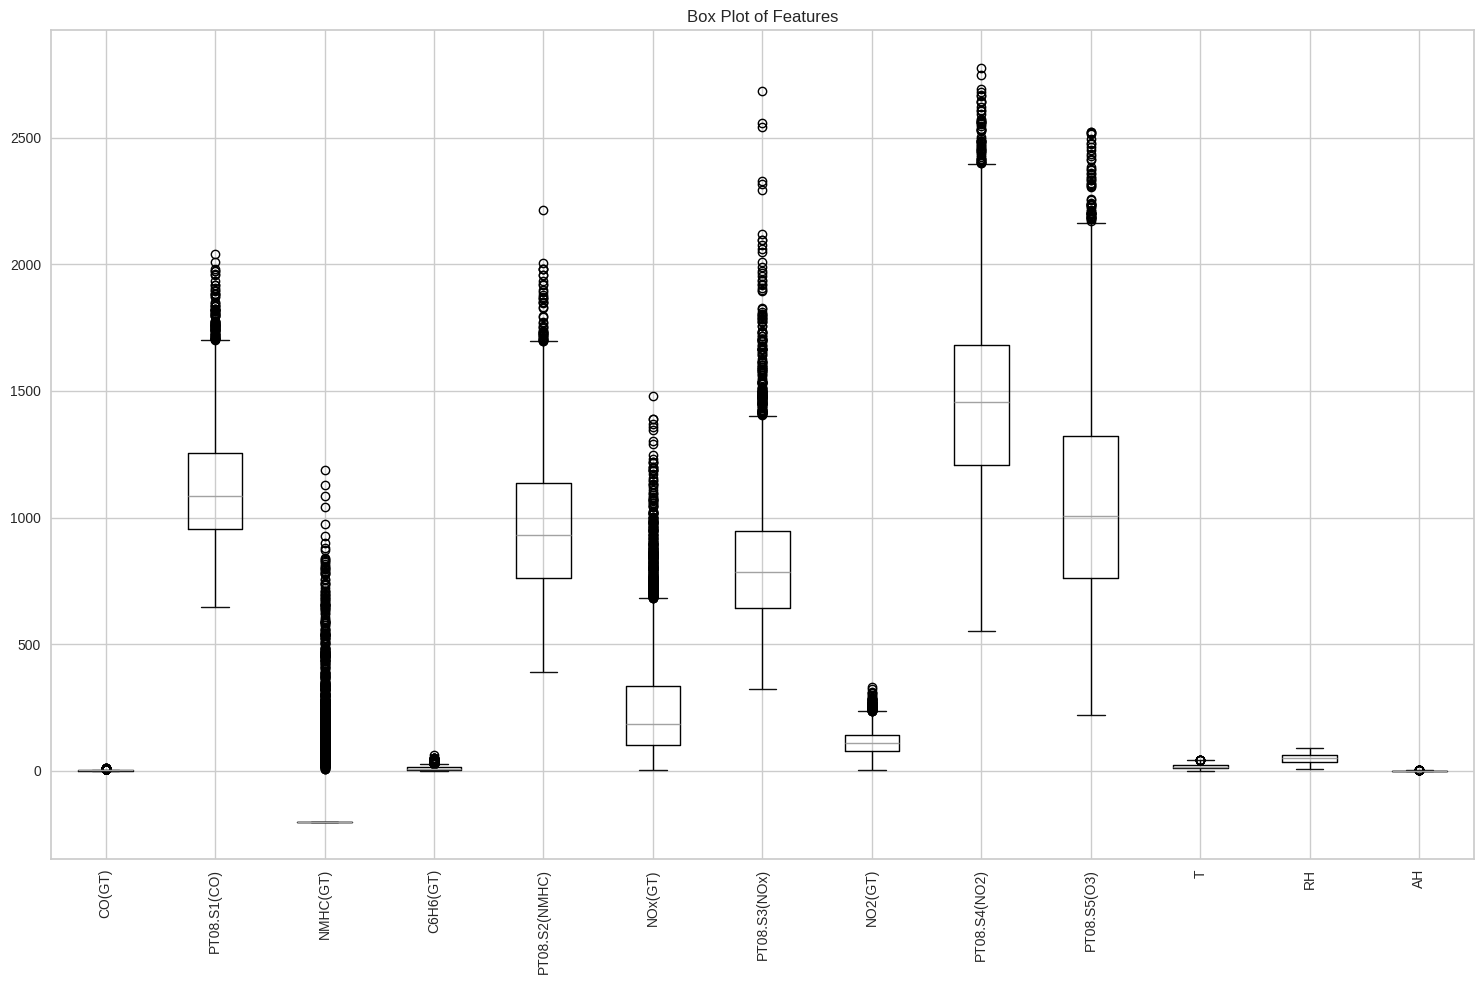

In [15]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.tight_layout()
plt.show()

**Insight:**
- Several features, such as NMHC(GT) and NOx(GT), have significant outliers that are far from the interquartile range (IQR).
- Features like C6H6(GT) and CO(GT) have a wide spread, indicating substantial variability in the data.

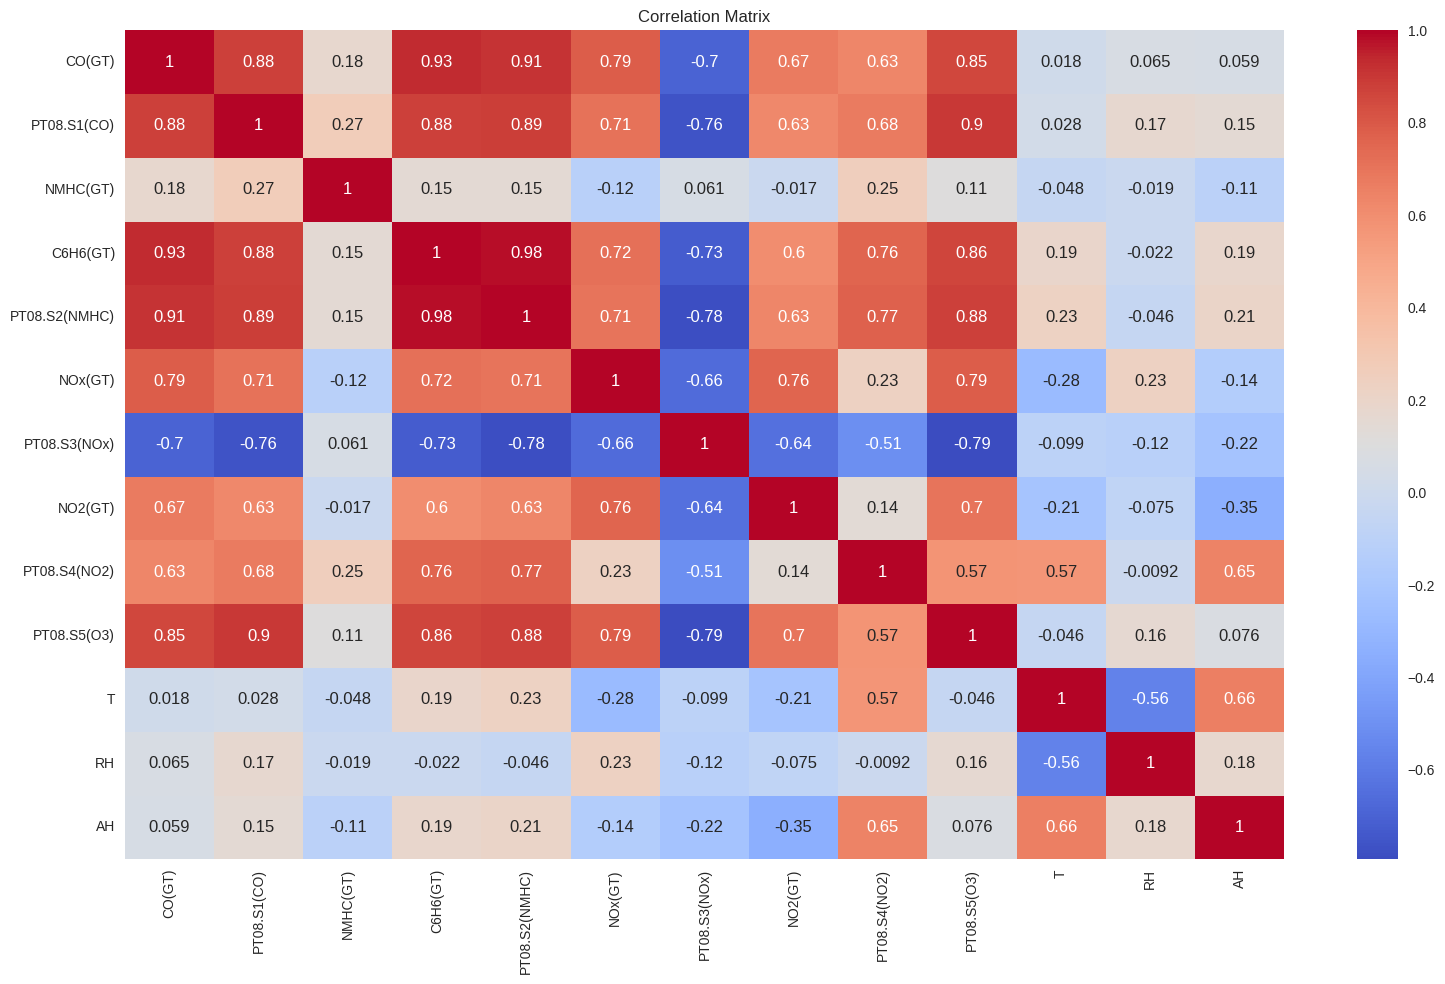

In [16]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

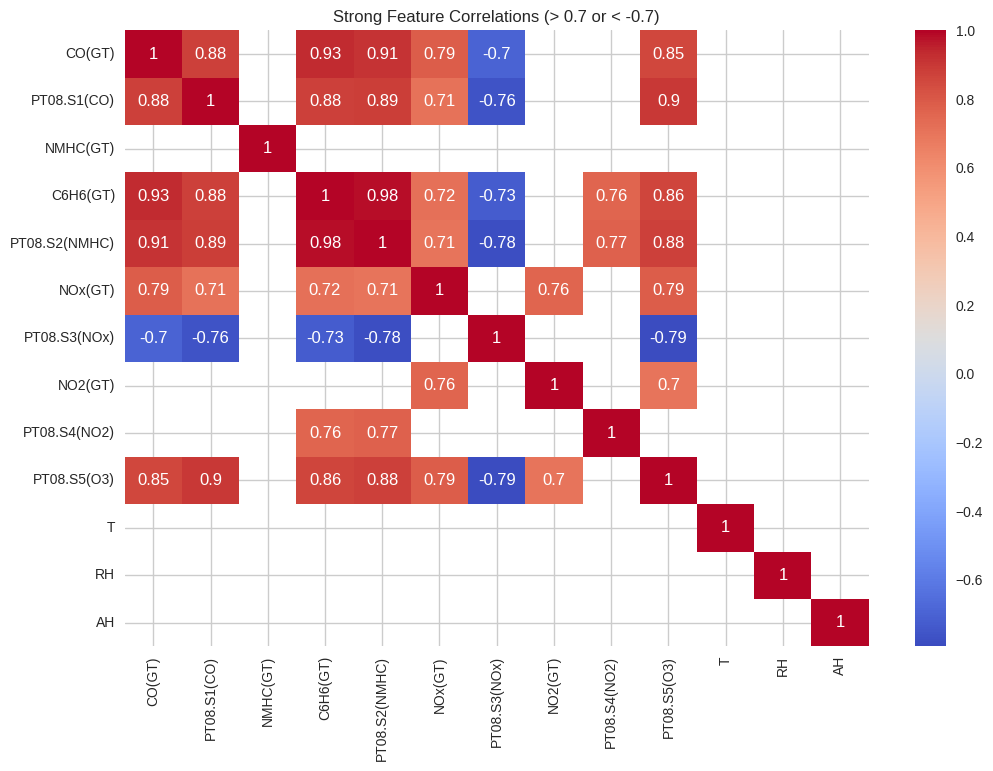

In [17]:
# Filter for strong correlations
correlation_matrix = numeric_df.corr()
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Strong Feature Correlations (> 0.7 or < -0.7)')
plt.show()

**Insight:**
- Strong positive correlations exist between:
  - C6H6(GT) and PT08.S2(NMHC) (0.98)
  - CO(GT) and C6H6(GT) (0.93)
  - PT08.S4(NO2) and PT08.S5(O3) (0.88)
- Negative correlations include:
  - PT08.S3(NOx) and PT08.S4(NO2) (-0.79)

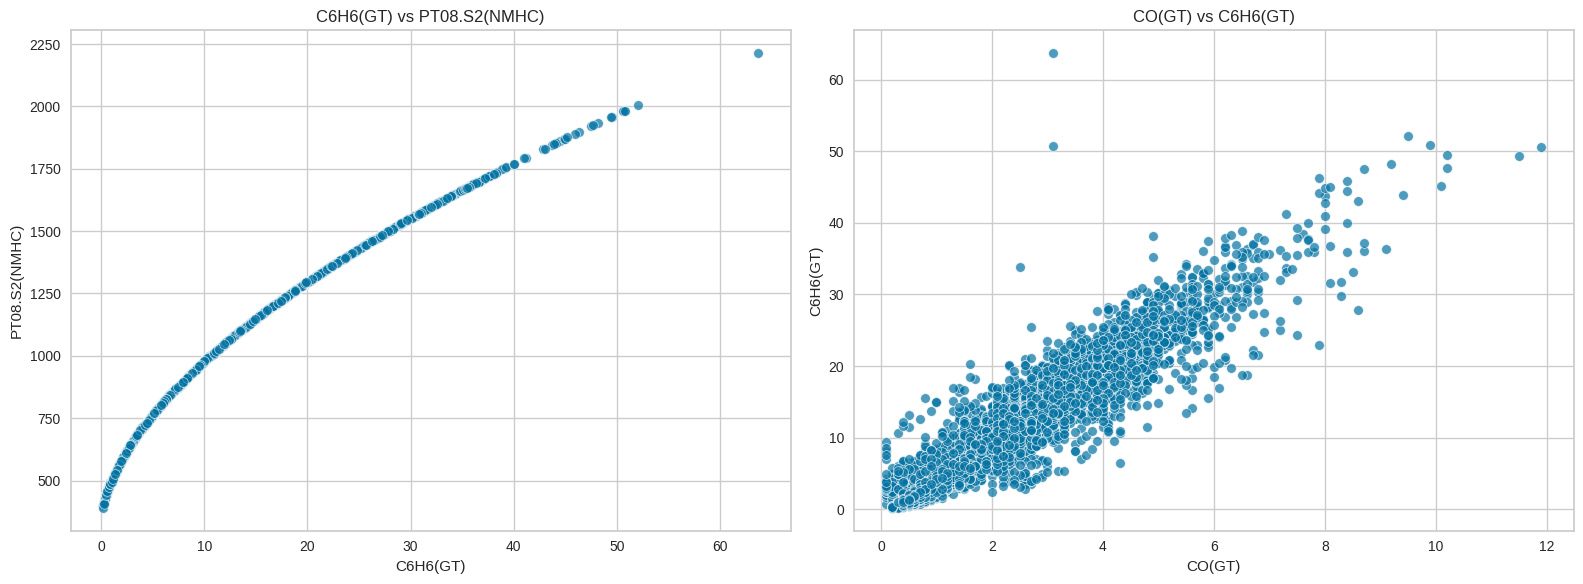

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S2(NMHC)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S2(NMHC)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PT08.S2(NMHC)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S2(NMHC)')

# CO(GT) vs C6H6(GT)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='C6H6(GT)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs C6H6(GT)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('C6H6(GT)')

plt.tight_layout()
plt.show()

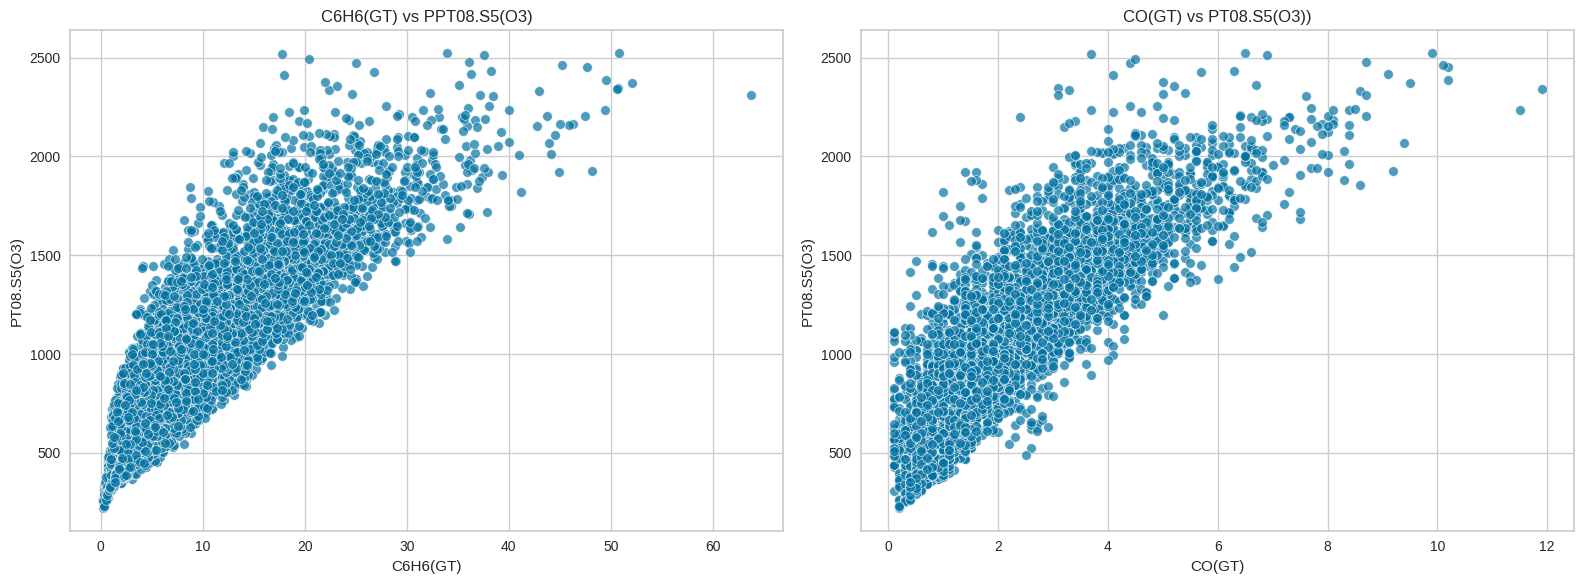

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PPT08.S5(O3)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S5(O3)')

# CO(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S5(O3))')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S5(O3)')

plt.tight_layout()
plt.show()

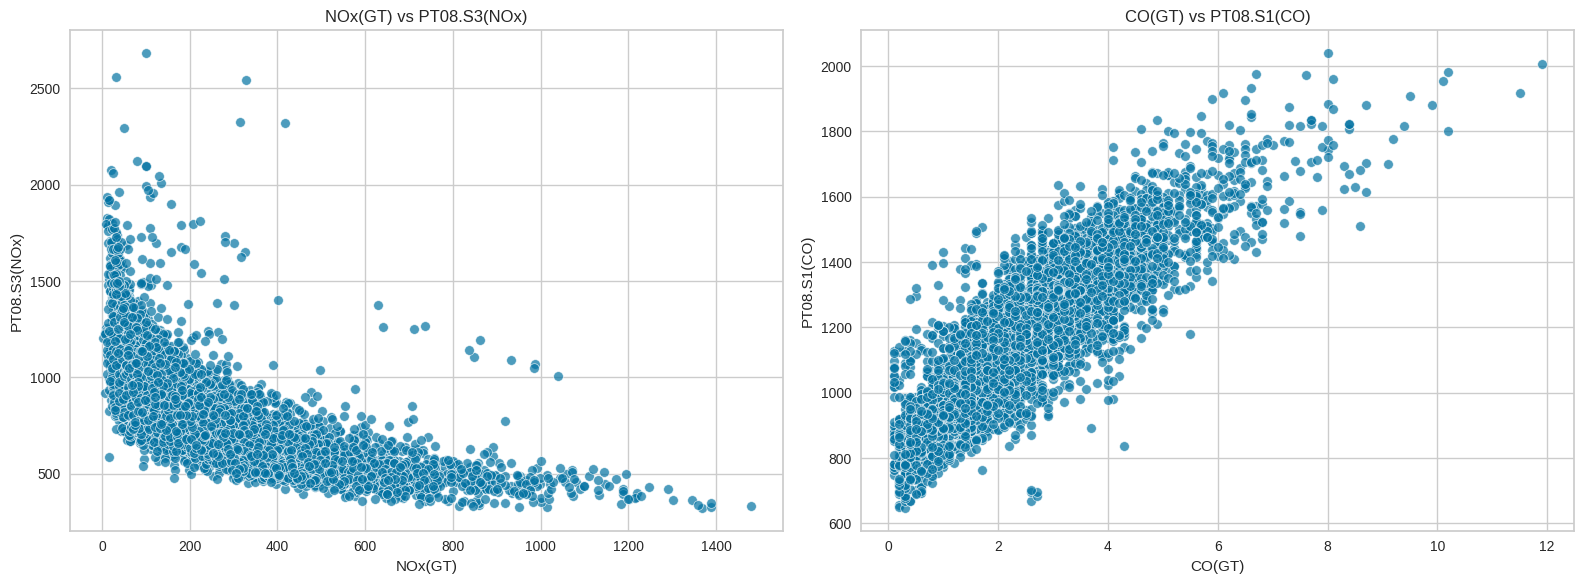

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# NOx(GT) vs PT08.S3(NOx)
sns.scatterplot(ax=axes[0], x='NOx(GT)', y='PT08.S3(NOx)', data=df, alpha=0.7)
axes[0].set_title('NOx(GT) vs PT08.S3(NOx)')
axes[0].set_xlabel('NOx(GT)')
axes[0].set_ylabel('PT08.S3(NOx)')

# CO(GT) vs PT08.S1(CO)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S1(CO)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S1(CO)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S1(CO)')

plt.tight_layout()
plt.show()

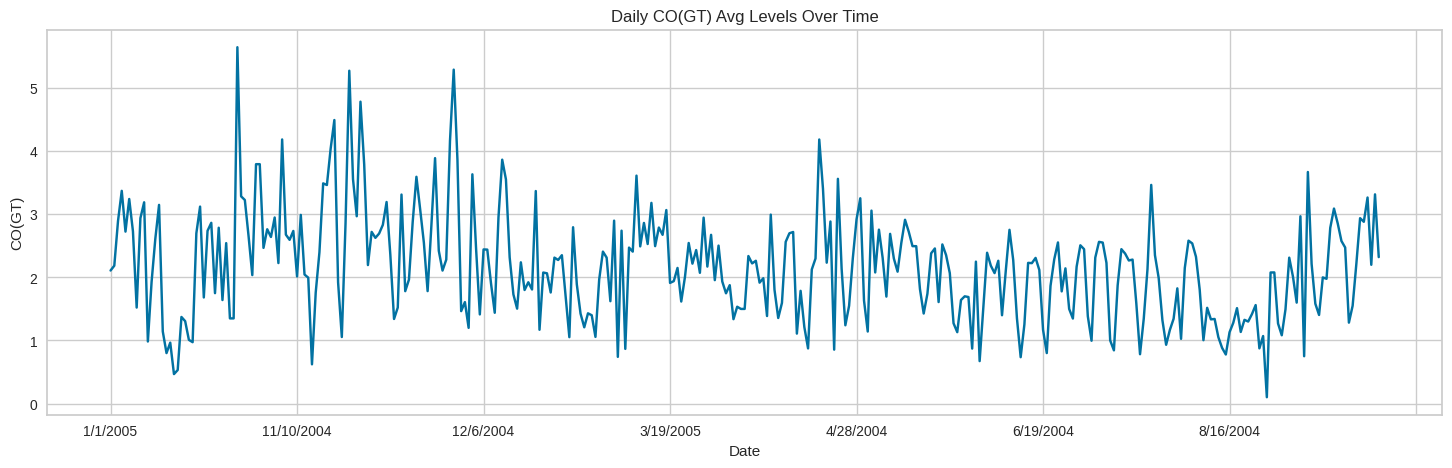

In [21]:
daily_avg = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily CO(GT) Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

# **5. Data Preprocessing**

## Remove Duplicated Rows & Missing Values

In [22]:
df.dropna(inplace=True)

In [23]:
df.drop_duplicates(inplace=True)

## Feature Engineering

In [24]:
# Create a new feature by combining 'CO(GT)' and 'PT08.S1(CO)'
df['CO_Product'] = df['CO(GT)'] * df['PT08.S1(CO)']
df['CO_Avg'] = (df['CO(GT)'] + df['PT08.S1(CO)']) / 2
df['CO_Ratio'] = df['CO(GT)'] / (df['PT08.S1(CO)'] + 1e-6)

df[['CO_Product', 'CO_Avg', 'CO_Ratio']].describe()

CO_Product   CO_Avg  CO_Ratio
count    6941.000 6941.000  6941.000
mean     2720.594  561.048     0.002
std      2383.456  109.999     0.001
min        74.900  323.650     0.000
25%      1075.000  479.000     0.001
50%      2023.500  543.450     0.002
75%      3627.900  628.500     0.002
max     23895.200 1024.000     0.006

In [25]:
# Create a new feature by combining 'C6H6(GT)' and 'PT08.S2(NMHC)'
df['Benzena_Product'] = df['C6H6(GT)'] * df['PT08.S2(NMHC)']
df['Benzena_Avg'] = (df['C6H6(GT)'] + df['PT08.S2(NMHC)']) / 2
df['Benzena_Ratio'] = df['C6H6(GT)'] / (df['PT08.S2(NMHC)'] + 1e-6)

df[['Benzena_Product', 'Benzena_Avg', 'Benzena_Ratio']].describe()

Benzena_Product  Benzena_Avg  Benzena_Ratio
count         6941.000     6941.000       6941.000
mean         12053.788      484.549          0.010
std          12074.660      135.697          0.004
min             78.000      195.100          0.000
25%           3724.000      382.450          0.006
50%           8192.800      469.900          0.009
75%          16571.000      574.800          0.013
max         141031.800     1138.850          0.029

In [26]:
# Total Polutan
df['Total_Polutan'] = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].sum(axis=1)

df['Total_Polutan'].describe()

count   6941.000
mean     228.638
std      284.965
min     -191.200
25%       18.500
50%      161.800
75%      366.100
max     1739.000
Name: Total_Polutan, dtype: float64

In [27]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract temporal components
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Binary feature: 1 for weekend, 0 for weekday

df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']].sample(5)

Year  Month  Day  Hour  DayOfWeek  IsWeekend
2615  2004      6   27    17          6          1
8140  2005      2   12    22          5          1
2308  2004      6   14    22          0          0
494   2004      3   31     8          2          0
8860  2005      3   14    22          0          0

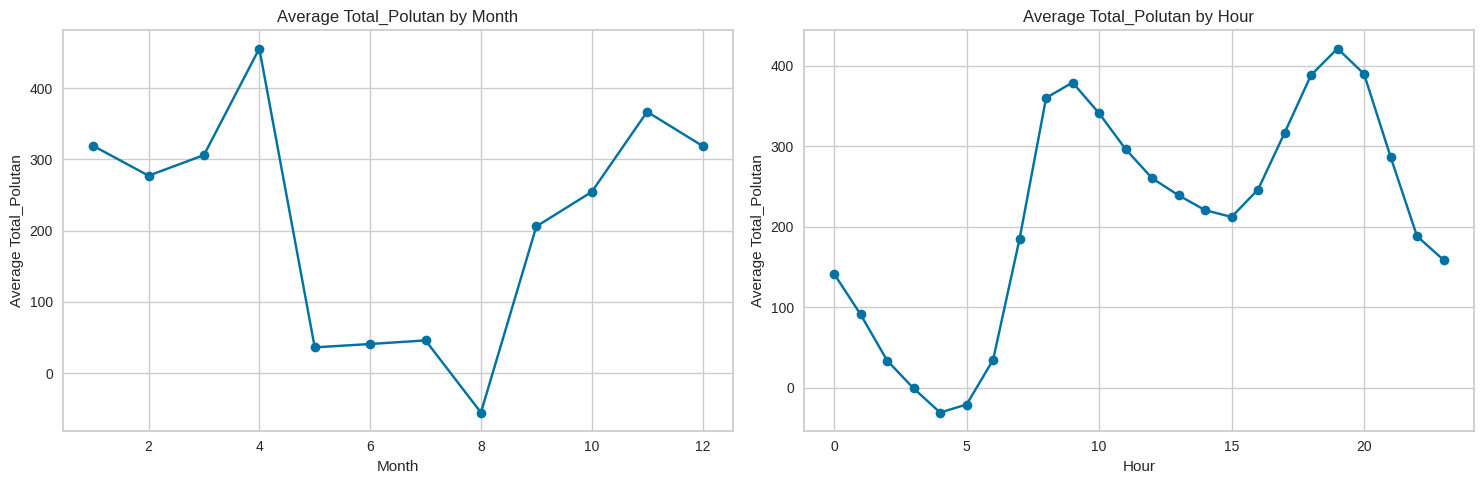

In [28]:
monthly_avg = df.groupby('Month')['Total_Polutan'].mean()
hourly_avg = df.groupby('Hour')['Total_Polutan'].mean()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Month')
plt.xlabel('Month')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.subplot(1, 2, 2)
hourly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.tight_layout()
plt.show()

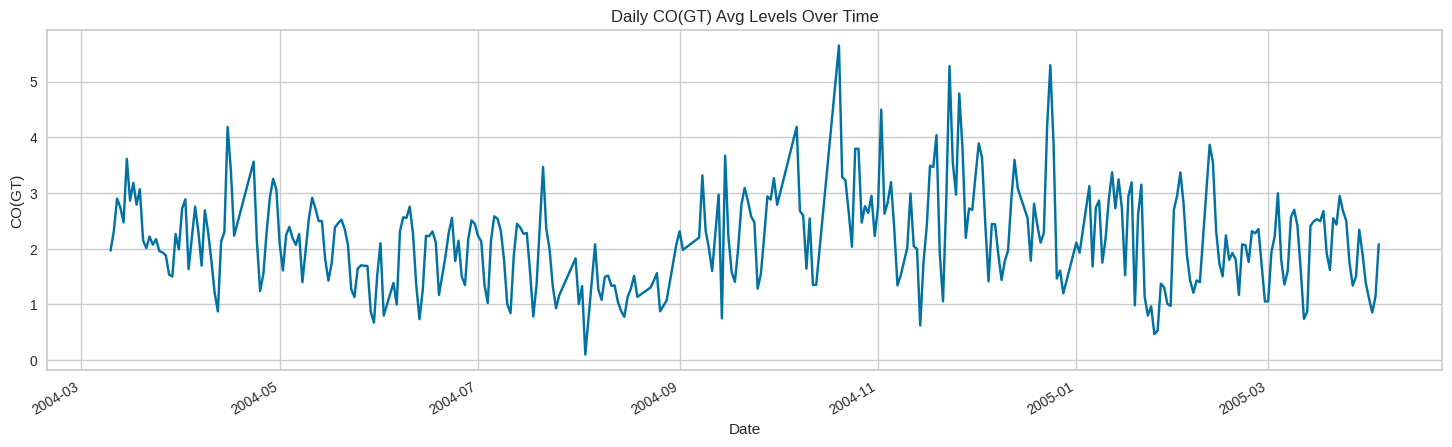

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
daily_avg = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily CO(GT) Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

## Handle Outliers

In [30]:
# Winsorize
for col in df:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

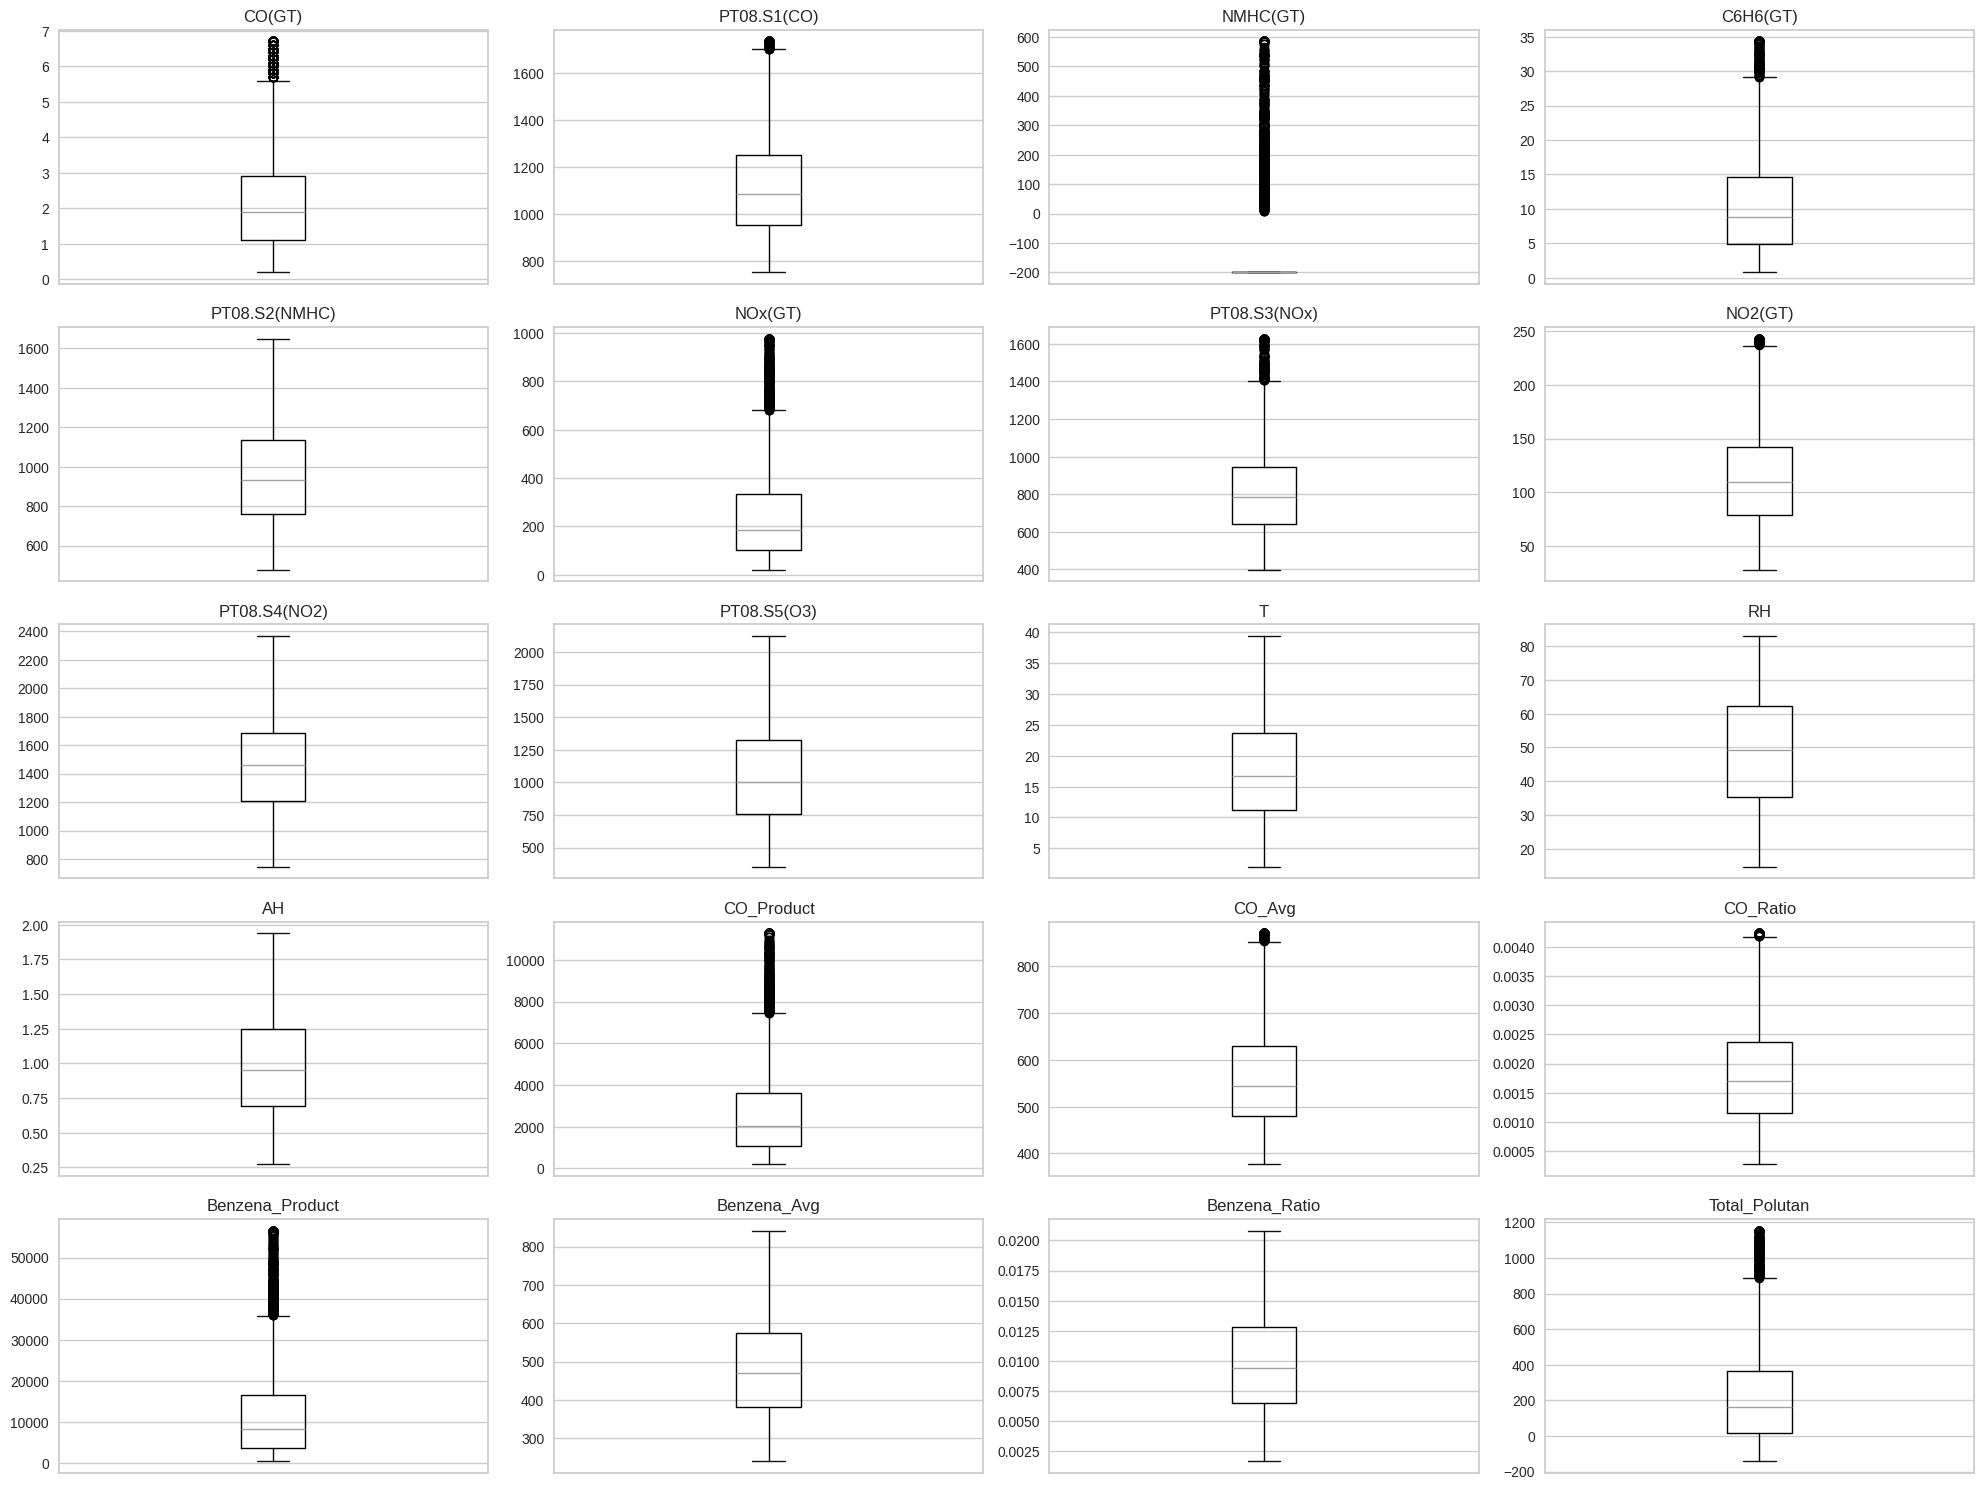

In [31]:
float_features = df.select_dtypes(include='float')

num_features = len(float_features.columns)
num_cols = 4
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(float_features.columns):
    float_features.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xticks([])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Encoding

In [32]:
# Binary Encoding for DayOfWeek
df['DayOfWeek_binary'] = df['DayOfWeek'].apply(lambda x: format(x, '03b'))

binary_columns = ['DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2']
df[binary_columns] = df['DayOfWeek_binary'].apply(lambda x: pd.Series(list(x))).astype(int)

df.drop(['DayOfWeek_binary'], axis=1, inplace=True)
df.drop(['DayOfWeek'], axis=1, inplace=True)

df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-13  18:00:00   2.600     1360.000   150.000    11.900   
1 2004-03-13  19:00:00   2.000     1292.000   112.000     9.400   
2 2004-03-13  20:00:00   2.200     1402.000    88.000     9.000   
3 2004-03-13  21:00:00   2.200     1376.000    80.000     9.200   
4 2004-03-13  22:00:00   1.600     1272.000    51.000     6.500   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0       1046.000  166.000      1056.000  113.000      1692.000     1268.000   
1        955.000  103.000      1174.000   92.000      1559.000      972.000   
2        939.000  131.000      1140.000  114.000      1555.000     1074.000   
3        948.000  172.000      1092.000  122.000      1584.000     1203.000   
4        836.000  131.000      1205.000  116.000      1490.000     1110.000   

       T     RH    AH  CO_Product  CO_Avg  CO_Ratio  Benzena_Product  \
0 13.600 48.900 0.758    3536.000 681.300     0.002        12447.400   
1 13.300 47.700 0.726    2584.000 647.000     0.002         8977.000   
2 11.900 54.000 0.750    3084.400 702.100     0.002         8451.000   
3 11.000 60.000 0.787    3027.200 689.100     0.002         8721.600   
4 11.200 59.600 0.789    2035.200 636.800     0.001         5434.000   

   Benzena_Avg  Benzena_Ratio  Total_Polutan            Datetime  Year  Month  \
0      528.950          0.011        443.500 2004-03-13 22:00:00  2004      3   
1      482.200          0.010        318.400 2004-03-13 22:00:00  2004      3   
2      474.000          0.010        344.200 2004-03-13 22:00:00  2004      3   
3      478.600          0.010        385.400 2004-03-13 22:00:00  2004      3   
4      421.250          0.008        306.100 2004-03-13 22:00:00  2004      3   

   Day  Hour  IsWeekend  DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  
0   10    18          0               0               1               0  
1   10    19          0               0               1               0  
2   10    20          0               0               1               0  
3   10    21          0               0               1               0  
4   10    22          0               0               1               0

In [33]:
# Label Encoding for Time
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])

In [34]:
# Cyclic Encoding for Hour & Month
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

## Data Binning

In [35]:
# Binning for CO(GT)
bins_co = [0, 2, 5, 12]
labels_co = ['Low', 'Medium', 'High']
df['CO_Category'] = pd.cut(df['CO(GT)'], bins=bins_co, labels=labels_co)

# Binning for T (Temperature)
df['Temperature_Category'] = pd.qcut(df['T'], q=3, labels=['Cold', 'Moderate', 'Hot'])

# Binning for NO2(GT)
bins_no2 = [0, 100, 200, 340]
labels_no2 = ['Low', 'Medium', 'High']
df['NO2_Category'] = pd.cut(df['NO2(GT)'], bins=bins_no2, labels=labels_no2)

# Binning for Hour (Time of Day)
def categorize_hour(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['Time_of_Day'] = df['Hour'].apply(lambda x: categorize_hour(x))

# Binning for C6H6(GT)
bins_c6h6 = [0, 10, 30, 64]
labels_c6h6 = ['Low', 'Medium', 'High']
df['C6H6_Category'] = pd.cut(df['C6H6(GT)'], bins=bins_c6h6, labels=labels_c6h6)

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

CO_Category Temperature_Category NO2_Category Time_of_Day C6H6_Category
7364      Medium             Moderate       Medium   Afternoon        Medium
2767         Low                  Hot          Low       Night           Low
7997         Low                 Cold       Medium     Evening           Low
4021         Low                  Hot          Low     Morning        Medium
8277         Low                 Cold       Medium   Afternoon           Low

In [36]:
df['Time_of_Day'].value_counts()

Time_of_Day
Evening      1849
Morning      1843
Afternoon    1841
Night        1408
Name: count, dtype: int64

In [37]:
# Label encoding for each binned column
label_cols = ['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

CO_Category  Temperature_Category  NO2_Category  Time_of_Day  \
262             1                     2             1            0   
8772            1                     0             1            2   
1467            2                     2             2            1   
8497            1                     0             2            1   
4870            2                     1             2            0   

      C6H6_Category  
262               1  
8772              1  
1467              2  
8497              1  
4870              2

In [38]:
columns_to_drop = ['Datetime', 'Date', 'Time', 'Month', 'Hour']
df.drop(columns=columns_to_drop, inplace=True)

df.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 6941.000     6941.000  6941.000  6941.000       6941.000 6941.000   
mean     2.170     1119.444  -150.199    10.498        957.621  249.381   
std      1.390      215.273   148.265     7.227        259.738  203.035   
min      0.200      754.000  -200.000     0.800        478.000   21.000   
25%      1.100      956.000  -200.000     4.900        760.000  103.000   
50%      1.900     1085.000  -200.000     8.800        931.000  186.000   
75%      2.900     1254.000  -200.000    14.600       1135.000  335.000   
max      6.700     1735.000   585.000    34.300       1649.000  977.000   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      6941.000 6941.000      6941.000     6941.000 6941.000 6941.000   
mean        814.910  113.741      1451.849     1056.650   17.753   48.884   
std         241.699   46.613       348.400      401.327    8.790   17.375   
min         399.000   28.000       745.000      352.000    2.000   14.600   
25%         642.000   79.000      1207.000      760.000   11.200   35.300   
50%         786.000  110.000      1457.000     1006.000   16.800   49.200   
75%         947.000  142.000      1683.000     1322.000   23.700   62.200   
max        1627.000  243.000      2366.000     2122.000   39.400   83.000   

            AH  CO_Product   CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  \
count 6941.000    6941.000 6941.000  6941.000         6941.000     6941.000   
mean     0.985    2693.228  560.804     0.002        11903.071      484.059   
std      0.398    2247.640  108.241     0.001        11291.262      133.432   
min      0.273     203.400  377.250     0.000          382.400      239.400   
25%      0.694    1075.000  479.000     0.001         3724.000      382.450   
50%      0.954    2023.500  543.450     0.002         8192.800      469.900   
75%      1.252    3627.900  628.500     0.002        16571.000      574.800   
max      1.939   11277.800  870.150     0.004        56560.700      841.650   

       Benzena_Ratio  Total_Polutan     Year      Day  IsWeekend  \
count       6941.000       6941.000 6941.000 6941.000   6941.000   
mean           0.010        227.328 2004.281   15.997      0.299   
std            0.004        279.369    0.449    8.708      0.458   
min            0.002       -143.200 2004.000    1.000      0.000   
25%            0.006         18.500 2004.000    9.000      0.000   
50%            0.009        161.800 2004.000   16.000      0.000   
75%            0.013        366.100 2005.000   24.000      1.000   
max            0.021       1153.700 2005.000   31.000      1.000   

       DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  Hour_cos  \
count        6941.000        6941.000        6941.000  6941.000  6941.000   
mean            0.443           0.420           0.428    -0.048    -0.040   
std             0.497           0.494           0.495     0.702     0.710   
min             0.000           0.000           0.000    -1.000    -1.000   
25%             0.000           0.000           0.000    -0.707    -0.707   
50%             0.000           0.000           0.000     0.000    -0.000   
75%             1.000           1.000           1.000     0.500     0.707   
max             1.000           1.000           1.000     1.000     1.000   

       Month_sin  Month_cos  CO_Category  Temperature_Category  NO2_Category  \
count   6941.000   6941.000     6941.000              6941.000      6941.000   
mean       0.145      0.010        1.357                 1.003         1.482   
std        0.707      0.692        0.564                 0.820         0.590   
min       -1.000     -1.000        0.000                 0.000         0.000   
25%       -0.500     -0.500        1.000                 0.000         1.000   
50%        0.000      0.000        1.000                 1.000         2.000   
75%        0.866      0.866        2.000                 2.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                6941 non-null   float64
 1   PT08.S1(CO)           6941 non-null   float64
 2   NMHC(GT)              6941 non-null   float64
 3   C6H6(GT)              6941 non-null   float64
 4   PT08.S2(NMHC)         6941 non-null   float64
 5   NOx(GT)               6941 non-null   float64
 6   PT08.S3(NOx)          6941 non-null   float64
 7   NO2(GT)               6941 non-null   float64
 8   PT08.S4(NO2)          6941 non-null   float64
 9   PT08.S5(O3)           6941 non-null   float64
 10  T                     6941 non-null   float64
 11  RH                    6941 non-null   float64
 12  AH                    6941 non-null   float64
 13  CO_Product            6941 non-null   float64
 14  CO_Avg                6941 non-null   float64
 15  CO_Ratio              6941

## Standardize Features

In [40]:
df_scaled = df.copy()

X = df_scaled.select_dtypes(include=['float64', 'int64']).columns
exclude_columns = ['IsWeekend', 'DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2']
X = [col for col in X if col not in exclude_columns]

scaler = StandardScaler()

df_scaled[X] = scaler.fit_transform(df_scaled[X])

df_scaled[X].head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0   0.309        1.118     2.025     0.194          0.340   -0.411   
1  -0.122        0.802     1.769    -0.152         -0.010   -0.721   
2   0.021        1.313     1.607    -0.207         -0.072   -0.583   
3   0.021        1.192     1.553    -0.180         -0.037   -0.381   
4  -0.410        0.709     1.357    -0.553         -0.468   -0.583   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH     AH  \
0         0.998   -0.016         0.689        0.527 -0.472  0.001 -0.571   
1         1.486   -0.466         0.308       -0.211 -0.507 -0.068 -0.652   
2         1.345    0.006         0.296        0.043 -0.666  0.294 -0.590   
3         1.147    0.177         0.379        0.365 -0.768  0.640 -0.498   
4         1.614    0.048         0.110        0.133 -0.746  0.617 -0.493   

   CO_Product  CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  Benzena_Ratio  \
0       0.375   1.113     0.116            0.048        0.336          0.367   
1      -0.049   0.796    -0.303           -0.259       -0.014          0.012   
2       0.174   1.305    -0.278           -0.306       -0.075         -0.048   
3       0.149   1.185    -0.244           -0.282       -0.041         -0.020   
4      -0.293   0.702    -0.637           -0.573       -0.471         -0.466   

   Total_Polutan  Hour_sin  Hour_cos  Month_sin  Month_cos  CO_Category  \
0          0.774    -1.356     0.057      1.209     -0.015        1.141   
1          0.326    -1.308     0.422      1.209     -0.015       -0.632   
2          0.418    -1.166     0.761      1.209     -0.015        1.141   
3          0.566    -0.939     1.053      1.209     -0.015        1.141   
4          0.282    -0.644     1.277      1.209     -0.015       -0.632   

   Temperature_Category  NO2_Category  Time_of_Day  C6H6_Category  
0                 1.216         0.877       -0.374          1.151  
1                 1.216        -0.818       -0.374         -0.739  
2                -1.224         0.877       -0.374         -0.739  
3                -1.224         0.877       -0.374         -0.739  
4                -1.224         0.877       -0.374         -0.739

In [41]:
df_scaled.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 6941.000     6941.000  6941.000  6941.000       6941.000 6941.000   
mean     0.000        0.000     0.000     0.000         -0.000   -0.000   
std      1.000        1.000     1.000     1.000          1.000    1.000   
min     -1.418       -1.698    -0.336    -1.342         -1.847   -1.125   
25%     -0.770       -0.759    -0.336    -0.775         -0.761   -0.721   
50%     -0.194       -0.160    -0.336    -0.235         -0.102   -0.312   
75%      0.525        0.625    -0.336     0.568          0.683    0.422   
max      3.259        2.860     4.959     3.294          2.662    3.584   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      6941.000 6941.000      6941.000     6941.000 6941.000 6941.000   
mean         -0.000    0.000         0.000        0.000    0.000   -0.000   
std           1.000    1.000         1.000        1.000    1.000    1.000   
min          -1.721   -1.840        -2.029       -1.756   -1.792   -1.973   
25%          -0.715   -0.745        -0.703       -0.739   -0.746   -0.782   
50%          -0.120   -0.080         0.015       -0.126   -0.108    0.018   
75%           0.547    0.606         0.664        0.661    0.677    0.766   
max           3.360    2.773         2.624        2.655    2.463    1.964   

            AH  CO_Product   CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  \
count 6941.000    6941.000 6941.000  6941.000         6941.000     6941.000   
mean     0.000      -0.000   -0.000    -0.000           -0.000       -0.000   
std      1.000       1.000    1.000     1.000            1.000        1.000   
min     -1.789      -1.108   -1.696    -1.765           -1.020       -1.834   
25%     -0.731      -0.720   -0.756    -0.755           -0.724       -0.762   
50%     -0.078      -0.298   -0.160    -0.132           -0.329       -0.106   
75%      0.670       0.416    0.625     0.635            0.413        0.680   
max      2.398       3.820    2.858     2.784            3.955        2.680   

       Benzena_Ratio  Total_Polutan     Year      Day  IsWeekend  \
count       6941.000       6941.000 6941.000 6941.000   6941.000   
mean           0.000          0.000 2004.281   15.997      0.299   
std            1.000          1.000    0.449    8.708      0.458   
min           -1.878         -1.326 2004.000    1.000      0.000   
25%           -0.767         -0.748 2004.000    9.000      0.000   
50%           -0.078         -0.235 2004.000   16.000      0.000   
75%            0.703          0.497 2005.000   24.000      1.000   
max            2.549          3.316 2005.000   31.000      1.000   

       DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  Hour_cos  \
count        6941.000        6941.000        6941.000  6941.000  6941.000   
mean            0.443           0.420           0.428     0.000     0.000   
std             0.497           0.494           0.495     1.000     1.000   
min             0.000           0.000           0.000    -1.356    -1.352   
25%             0.000           0.000           0.000    -0.939    -0.939   
50%             0.000           0.000           0.000     0.069     0.057   
75%             1.000           1.000           1.000     0.781     1.053   
max             1.000           1.000           1.000     1.494     1.466   

       Month_sin  Month_cos  CO_Category  Temperature_Category  NO2_Category  \
count   6941.000   6941.000     6941.000              6941.000      6941.000   
mean       0.000      0.000       -0.000                 0.000        -0.000   
std        1.000      1.000        1.000                 1.000         1.000   
min       -1.620     -1.460       -2.406                -1.224        -2.513   
25%       -0.913     -0.737       -0.632                -1.224        -0.818   
50%       -0.205     -0.015       -0.632                -0.004         0.877   
75%        1.020      1.236        1.141                 1.

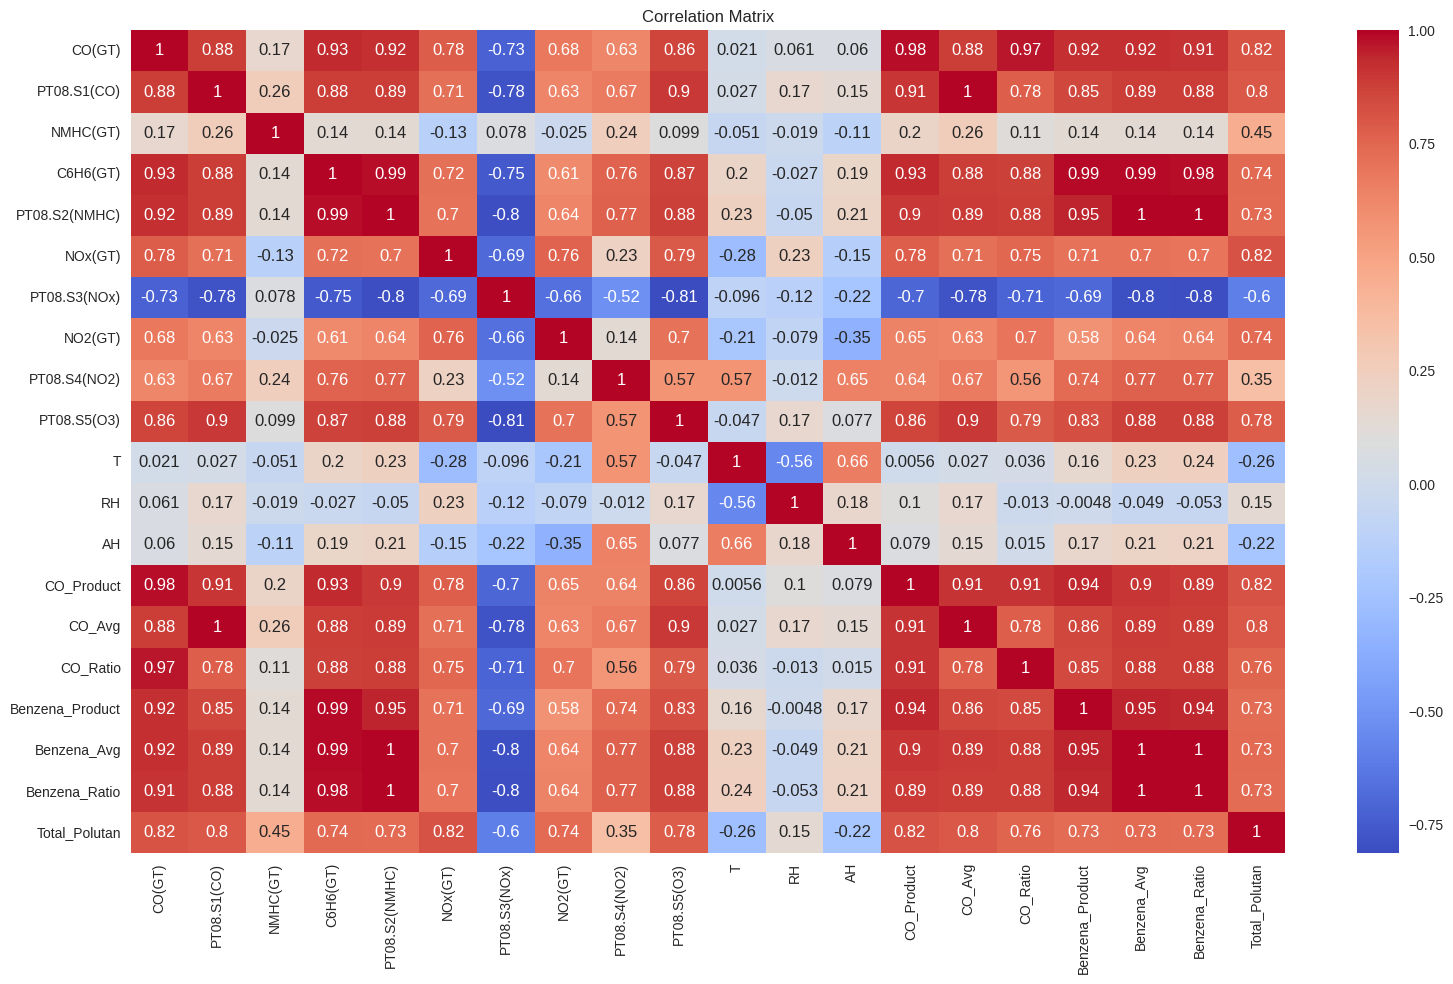

In [42]:
excluded_columns = list(df_scaled.columns[-15:])
df_subset = df_scaled.drop(columns=excluded_columns)

plt.figure(figsize=(16, 10))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## PCA

Explained Variance Ratio by Principal Components:
[0.65139751 0.13548491]


Text(0.5, 1.0, 'PCA Result')

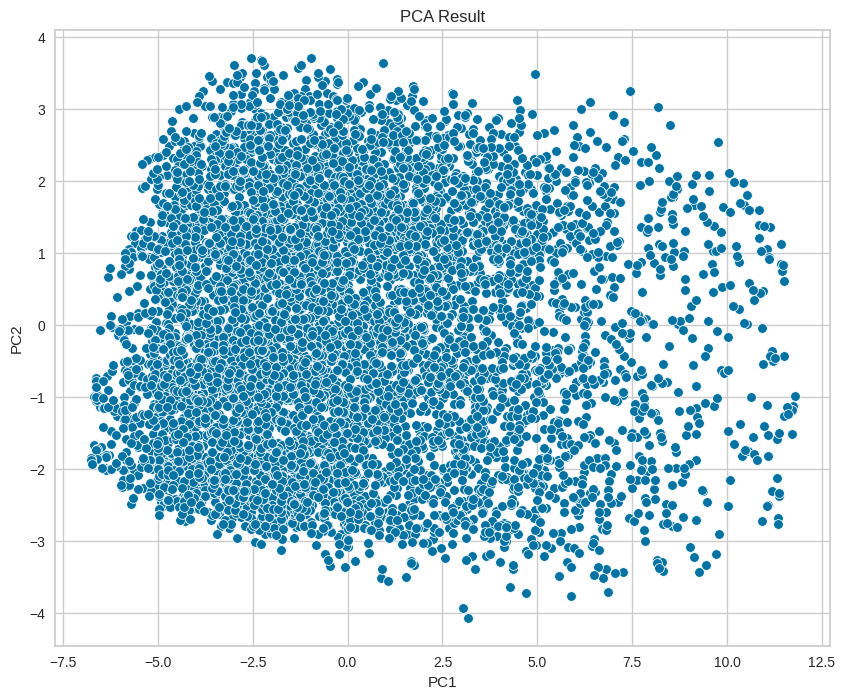

In [43]:
# Initialize PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_subset)

# Create a DataFrame for the principal components
x_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the explained variance ratio
print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca, x='PC1', y='PC2')
plt.title('PCA Result')

# **6. Clustering Model Building**

## **Clustering Model Building & Evaluation**

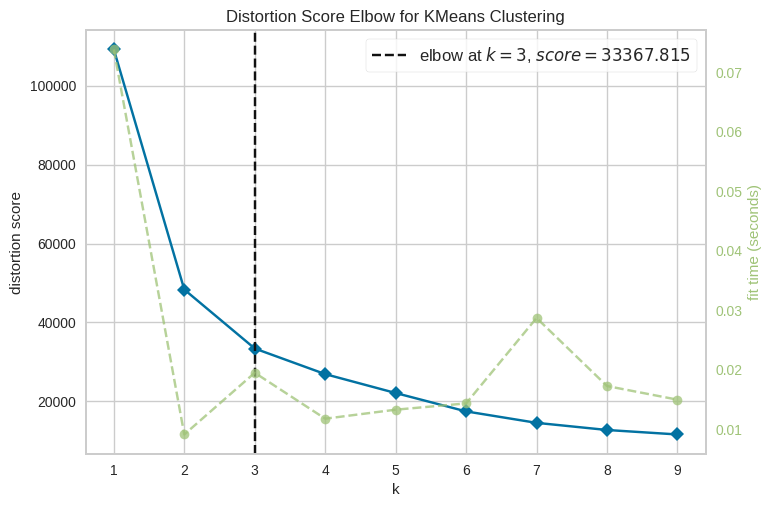

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(x_pca)
visualizer.show()

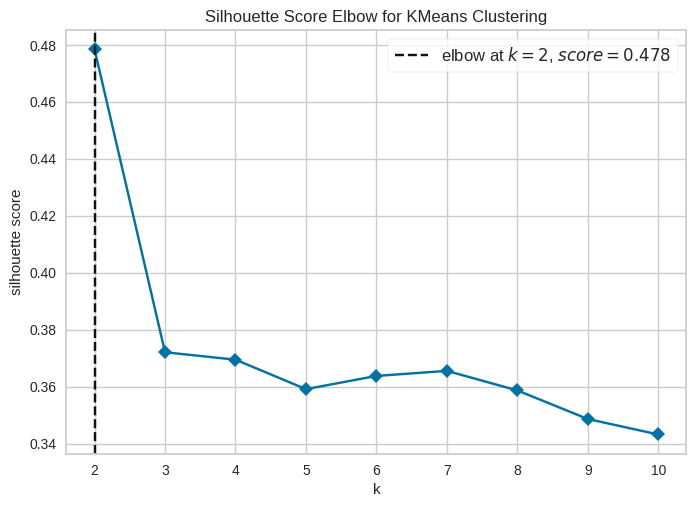

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

visualizer.fit(x_pca)
visualizer.show()

In [46]:
# DBSCAN
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.2]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(x_pca)

    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

    if num_clusters > 1:
        sil_score = silhouette_score(x_pca, dbscan_labels)
        print(f"eps: {eps}, Number of Clusters: {num_clusters}, Silhouette Score: {sil_score:.3f}")
    else:
        print(f"eps: {eps}, Number of Clusters: {num_clusters} (Silhouette Score not applicable)")

eps: 0.2, Number of Clusters: 24, Silhouette Score: -0.301
eps: 0.3, Number of Clusters: 17, Silhouette Score: 0.344
eps: 0.4, Number of Clusters: 5, Silhouette Score: 0.396
eps: 0.5, Number of Clusters: 2, Silhouette Score: 0.387
eps: 0.6, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 0.8, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 0.9, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 1.0, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 1.2, Number of Clusters: 1 (Silhouette Score not applicable)


## **Feature Selection**

In [47]:
selected_features = ['Benzena_Ratio', 'Benzena_Product', 'CO_Ratio', 'CO_Product', 'Total_Polutan']
x = df_scaled[selected_features]

Explained Variance Ratio by Principal Components:
[0.87761759 0.06771242]


Text(0.5, 1.0, 'PCA Result')

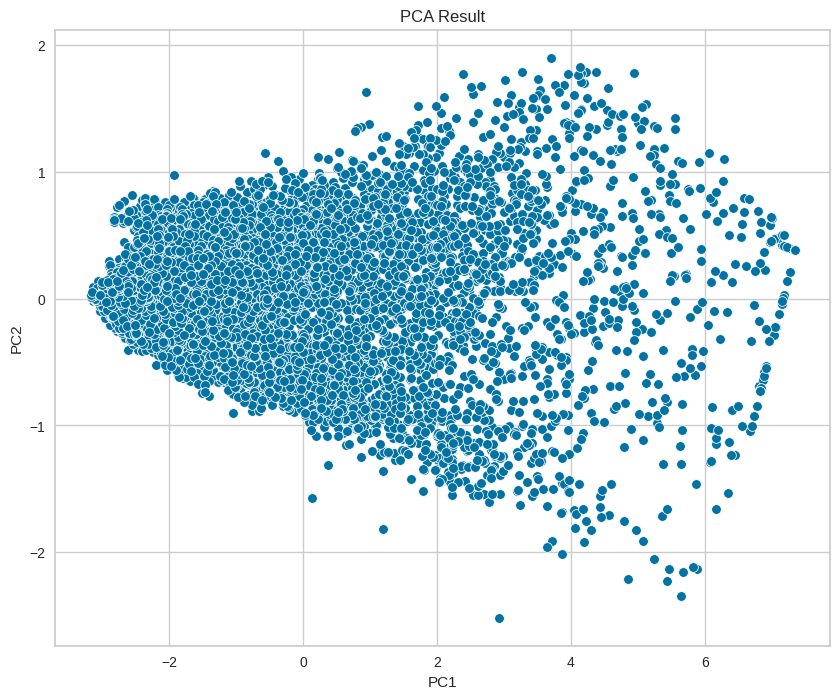

In [48]:
# Initialize PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame for the principal components
x_pca1 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the explained variance ratio
print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca1, x='PC1', y='PC2')
plt.title('PCA Result')

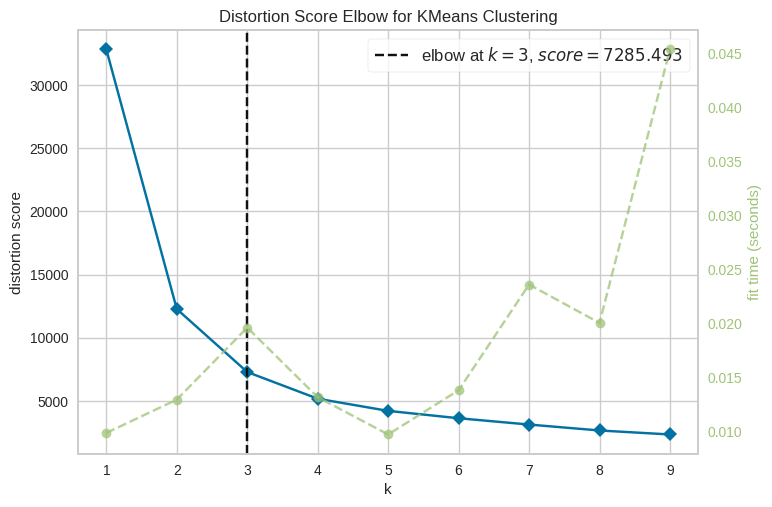

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(x_pca1)
visualizer.show()

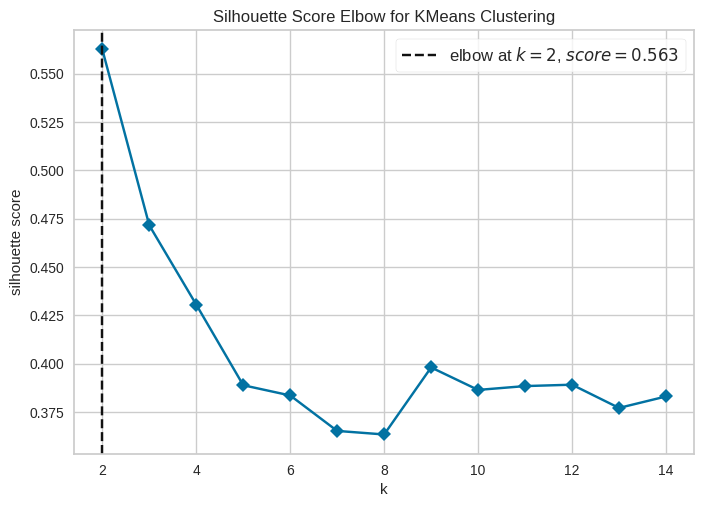

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)

visualizer.fit(x_pca1)
visualizer.show()

In [51]:
# DBSCAN
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.2]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(x_pca1)

    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

    if num_clusters > 1:
        sil_score = silhouette_score(x_pca1, dbscan_labels)
        print(f"eps: {eps}, Number of Clusters: {num_clusters}, Silhouette Score: {sil_score:.3f}")
    else:
        print(f"eps: {eps}, Number of Clusters: {num_clusters} (Silhouette Score not applicable)")

eps: 0.2, Number of Clusters: 10, Silhouette Score: 0.447
eps: 0.3, Number of Clusters: 3, Silhouette Score: 0.449
eps: 0.4, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 0.5, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 0.6, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 0.8, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 0.9, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 1.0, Number of Clusters: 1 (Silhouette Score not applicable)
eps: 1.2, Number of Clusters: 1 (Silhouette Score not applicable)


## **Cluster Visualization**

### Before Feature Selection

In [52]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca)
x_pca['Cluster'] = clusters
clusters

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

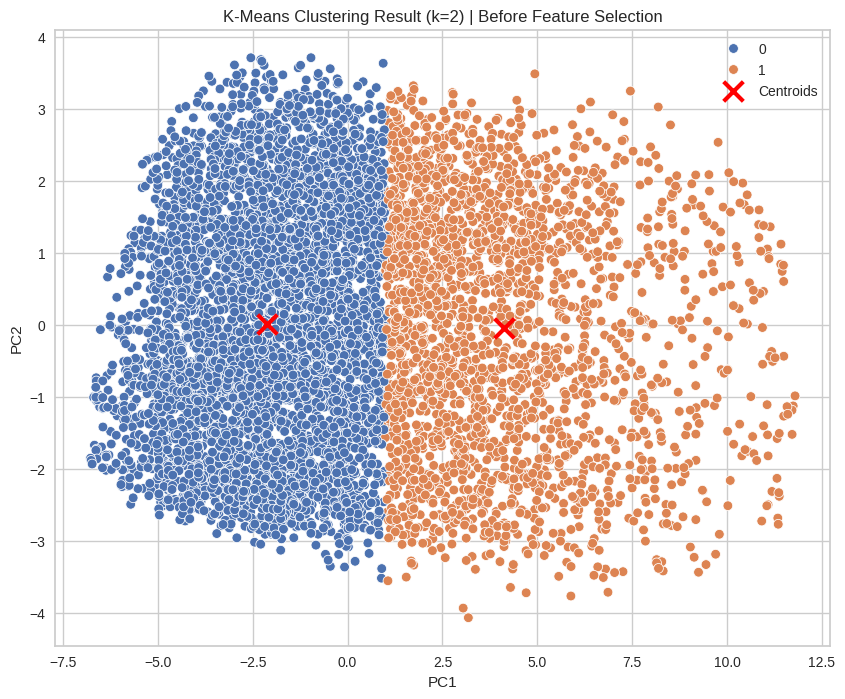

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | Before Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

### After Feature Selection

In [54]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca1)
x_pca1['Cluster'] = clusters
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

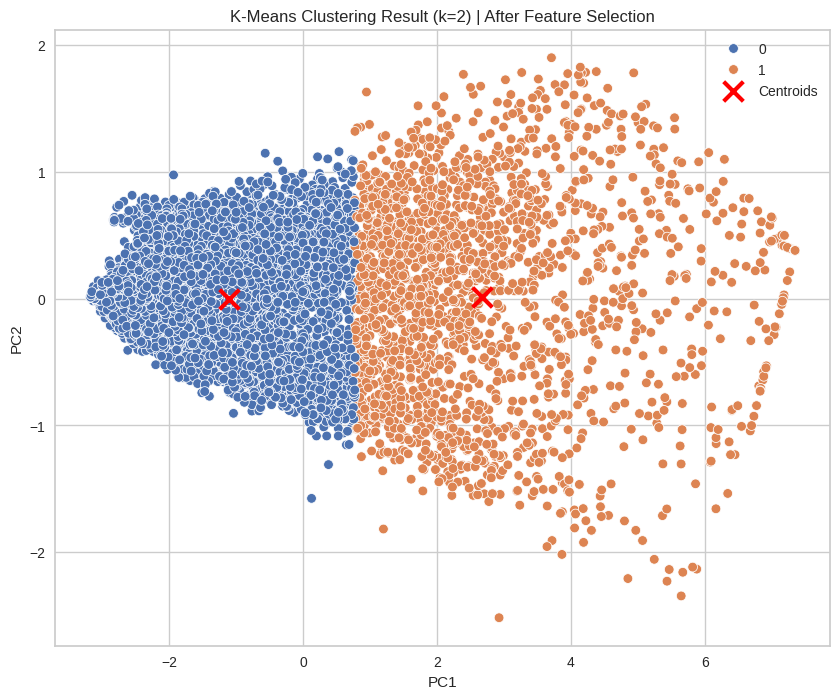

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca1, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | After Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

## **Analysis and Interpretation of Cluster Results**

1. Cluster 1:
2. Cluster 2:

# **7. Exporting Data**

Save the results into a CSV file.